# Time Series Analysis (Sentiment)

### Libraries

In [62]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt

### Data

In [48]:
# load review time series

review_ts = pd.read_csv('review_ts.csv', index_col=0, parse_dates=True)

review_ts

,review_id
date,
2011-01-08 23:52:22,NvusujU9_5pIUbn9SZ6hMA
2018-06-09 01:37:02,vHOeBa7aMA_na4rfS2Db5A
2010-03-13 22:33:10,hG9RTxxivb0ZXzEk4JXTXA
2017-12-16 03:11:50,zIVkwgahZjOneChZFUYY4g
2015-04-28 20:29:40,DLczAuvMAlAnY5EeDGhTVg
...,...
2014-08-16 02:47:47,OgoBp7fbXnLSKvsQb4O_tw
2021-12-20 11:58:50,Q7e8EtZMmdknDrQE7huMoQ
2019-10-04 21:57:19,zzMW6zbsFaQMjoGu2bGVdA


In [26]:
# load review sentiment data

sentiment_df = pd.read_csv('../nlp/review_sentiment.csv')

sentiment_df

,review_id,text,positive,neutral,negative
0,NvusujU9_5pIUbn9SZ6hMA,Stopped by to munch a burger during today's Se...,1,0,0
1,vHOeBa7aMA_na4rfS2Db5A,"Yelp doesn't allow to leave 0 star review, so ...",0,0,1
2,hG9RTxxivb0ZXzEk4JXTXA,I find it hard to believe there are so many pe...,0,0,1
3,zIVkwgahZjOneChZFUYY4g,Love this place! Almost all of their menu item...,1,0,0
4,DLczAuvMAlAnY5EeDGhTVg,Excellent customer service. I wish I could ren...,1,0,0
...,...,...,...,...,...
63446,OgoBp7fbXnLSKvsQb4O_tw,"I really loved the food and service. I mean, t...",1,0,0
63447,Q7e8EtZMmdknDrQE7huMoQ,Their Grove location was the bomb. Delicious f...,1,0,0
63448,zzMW6zbsFaQMjoGu2bGVdA,A nice ean BBQ joint right across from some ne...,1,0,0
63449,scgoa60EvhW2Mz7JMqLYGw,The perfect Hookah bar. I'm not sure what they...,1,0,0


In [49]:
# time series for positive, neutral, and negative reviews

positive_reviews = sentiment_df[sentiment_df['positive'] == 1]['review_id']
positive_review_ts = review_ts[review_ts['review_id'].isin(positive_reviews)]

neutral_reviews = sentiment_df[sentiment_df['neutral'] == 1]['review_id']
neutral_review_ts = review_ts[review_ts['review_id'].isin(neutral_reviews)]

negative_reviews = sentiment_df[sentiment_df['negative'] == 1]['review_id']
negative_review_ts = review_ts[review_ts['review_id'].isin(negative_reviews)]

In [67]:
# review sentiments per month

reviews_per_month = review_ts.resample('ME').size()
positive_reviews_per_month = positive_review_ts.resample('ME').size()
neutral_reviews_per_month = neutral_review_ts.resample('ME').size()
negative_reviews_per_month = negative_review_ts.resample('ME').size()

In [ ]:
# TODO: get time series representing sentiment score per month (maybe considering positive=1, neutral=0, negative=-1)

### Visualization

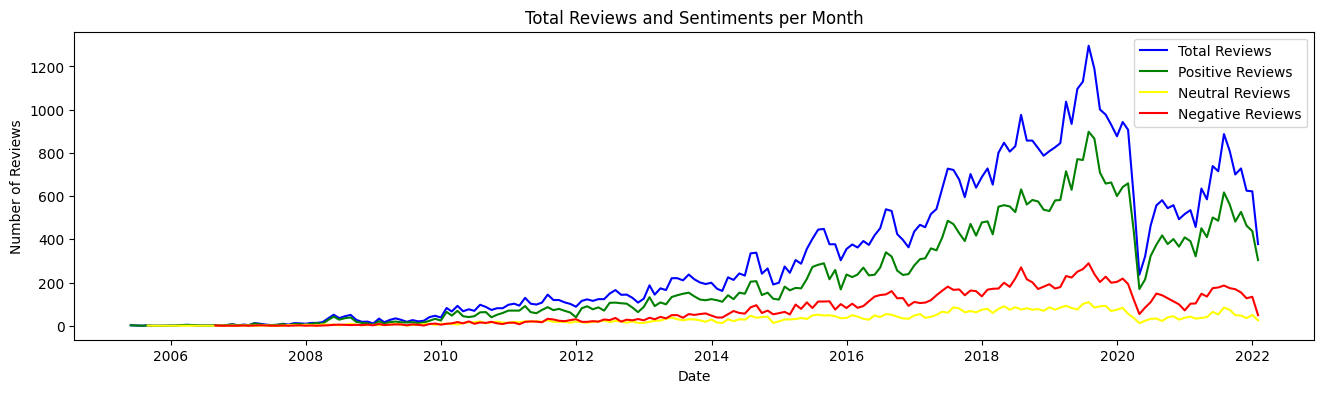

In [63]:
# comparison of total reviews and sentiments per month

fig, ax = plt.subplots(figsize=(16, 4))

ax.plot(reviews_per_month.index, reviews_per_month, color='blue', label='Total Reviews')
ax.plot(positive_reviews_per_month.index, positive_reviews_per_month, color='green', label='Positive Reviews')
ax.plot(neutral_reviews_per_month.index, neutral_reviews_per_month, color='yellow', label='Neutral Reviews')
ax.plot(negative_reviews_per_month.index, negative_reviews_per_month, color='red', label='Negative Reviews')

ax.set_title('Total Reviews and Sentiments per Month')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Reviews')
ax.legend()
plt.show()

In [ ]:
# TODO: plot time series with sentiment scores